# Wish Product Sales Prediction 

**Group 2** Tejaswini Kambhampati, Jeffrey Monticelli, Swetha Sarma, Hongjin Wu

# Import Libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk

In [ ]:
# set display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#pd.options.display.max_columns = 160
#pd.options.display.max_colwidth = 300

pd.set_option("display.max_rows", 80)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)

# Load Data

In [ ]:
#load data from the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import data from excel file 
df = pd.read_excel('/content/drive/Shareddrives/MSIS2631-Machine Learning/Final Project_Wish/Data&DataDisctionary/dataset with data dictionary.xlsx')

In [ ]:
df.shape

(1573, 43)

In [ ]:
df.head(2)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets,16.0,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajamasset,womencasualshort,Women's Fashion,flamingo,loungewearset,Casual,Shirt,casualsleepwear,Shorts,flamingotshirt,Elastic,Vintage,Tops,tshirtandshortsset,Women,Sleepwear,Print,womenpajamasset,womennightwear,Pajamas,womensleepwearset",white,M,50,Livraison standard,4,0,34,50,1.0,Quantit√© limit√©e !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae51d43d6a96e303acdb0-medium.jpg,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soir√©e Party Soir√©e sans manches V√™tements de plage sexy Mini robe femme wshC1612242400387A21,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion dress,Dress,Mini dress,Women's Fashion,Women S Clothing,backless,party,summer dresses,sleeveless,sexy,Casual",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantit√© limit√©e !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940d436a0d3d5da4e95a38-medium.jpg,58940d436a0d3d5da4e95a38,summer,2020-08


# Exploratory Data Analysis

## About the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
#check for duplicates in the dataset 
df.duplicated().sum()

34

In [ ]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,95.735602,0.105531,0.018436,0.074380,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,214.075544,0.340709,0.134565,0.262472,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,20.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,94.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,2789.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [ ]:
df.describe(include = 'all')

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
count,1573,1573,1573.000000,1573.000000,1573,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573,1532,1559,1573.000000,1573,1573.000000,1573.000000,1573.000000,1573.000000,473.0,473,1556,1573,1569,1572,1.573000e+03,1573.000000,1573,1573.000000,226,1573,1573,1573,1573,1573
unique,1201,1203,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1230,101,106,NaN,15,NaN,NaN,NaN,NaN,NaN,2,6,958,957,1058,NaN,NaN,958,NaN,125,1341,1341,1341,1,1
top,Nouvelle mode d'√©t√© femmes robe d√©contract√©e col rond l√¢che Big Swing jupe sans manches Soild couleur robe de plage,New Fashion Summer Women Casual Dress Round Neck Loose Big Swing Skirt Sleeveless Soild Color Beach dress,NaN,NaN,EUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women's Fashion,Round neck,beach dress,sleeveless,Beach,Casual,Women",black,S,NaN,Livraison standard,NaN,NaN,NaN,NaN,NaN,Quantit√© limit√©e !,CN,guangzhouweishiweifushiyouxiangongsi,ÂπøÂ∑ûÂîØÈÄÇÂîØÊúçÈ•∞ÊúâÈôêÂÖ¨Âè∏,"83 % avis positifs (32,168 notes)",NaN,NaN,558c2cdc89d53c4005ea2920,NaN,https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5acaf29d5ebcfd72403106a8.jpg,https://www.wish.com/c/5e16cb87e6dd7c03be24b28a,https://contestimg.wish.com/api/webimage/5e16cb87e6dd7c03be24b28a-medium.jpg,5e16cb87e6dd7c03be24b28a,summer,2020-08
freq,24,24,NaN,NaN,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,302,641,NaN,1508,NaN,NaN,NaN,NaN,NaN,472,1516,15,15,14,NaN,NaN,15,NaN,12,3,3,3,1573,1573
mean,NaN,NaN,8.325372,23.288620,NaN,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,95.735602,0.105531,0.018436,0.074380,0.012715,NaN,NaN,NaN,33.081373,NaN,2.345200,0.002543,40.456453,49.821360,1.0,NaN,NaN,NaN,NaN,NaN,2.649583e+04,4.032345,NaN,0.143675,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,3.932030,30.357863,NaN,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,214.075544,0.340709,0.134565,0.262472,0.112075,NaN,NaN,NaN,21.353137,NaN,1.024371,0.050379,20.301203,2.562799,0.0,NaN,NaN,NaN,NaN,NaN,7.847446e+04,0.204768,NaN,0.350871,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,0.000000,6.000000,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2.333333,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,5.810000,7.000000,NaN,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,2.000000,0.000000,31.000000,50.000000,1.0,NaN,NaN,NaN,NaN,NaN,1.987000e+03,3.917353,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.000000,10.000000,NaN,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,20.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,50.000000,NaN,2.000000,0.000000,40.000000,50.000000,1.0,NaN,NaN,NaN,NaN,NaN,7.936000e+03,4.040650,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,11.000000,26.000000,NaN,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,94.000000,0.000000,0.000000,0.000000,0

# Data Cleaning

## Drop Irrelevant Columns and Records

### Drop irrelevant columns
Dropping columns that are not helpful

<br><b>'currency_buyer'</b>: has only 1 unique value 'EUR'. </br>
<br><b>'shipping_option_name'</b>: mostly 'standard shipping' in different european languages. </br>
<br><b>'shipping_is_express'</b>: with 99% 0 values. </br>
<br><b>'urgency_text'</b>: text values coresponding to 'has_urgency_banner'</br>
<br><b>'merchant_title'</b>: Merchant's(seller's) displayed name (show in the UI as the seller's shop name)</br>
<br><b>'merchant_name'</b>: Merchant's canonical name. A name not shown publicly.</br>
<br><b>'merchant_id'</b>: merchant unique id</br>
<br><b>'merchant_profile_picture'</b>: 86% null values, we used the feature 'merchant_has_profile_picture' instead</br>
<br><b>'product_url'</b>: url of the product </br>
<br><b>'product_picture'</b>: url of product image</br>
<br><b>'product_id'</b>: product unique id</br>
<br><b>'theme'</b>: only one value 'summer' </br>
<br><b>'crawl_month'</b>: only one value - when this dataset was collected</br>

In [ ]:
# columns to be dropped 
cols =  ['currency_buyer','shipping_option_name','shipping_is_express',\
         'urgency_text','merchant_title','merchant_name','merchant_id','merchant_profile_picture',\
         'product_url','product_picture','product_id','theme','crawl_month']

In [ ]:
df_clean = df.drop(columns=cols)

In [ ]:
# check number of columns
len(df_clean.columns) == len(df.columns)-len(cols)

True

In [ ]:
df_clean.shape

(1573, 30)

### Drop Duplicated Records

In [ ]:
# The dataset has 34 duplicated records
df_clean.duplicated().sum()

34

In [ ]:
#df_clean[df_clean.duplicated(keep=False)]

In [ ]:
# drop duplicated records and reindex
df_clean = df_clean.drop_duplicates(ignore_index=True)

In [ ]:
# if correctly dropped
len(df_clean) == len(df)-(df.duplicated().sum())

True

In [ ]:
# check index
df_clean.tail(1)

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture
1538,Pantalon de yoga pour femmes √† la mode Slim Fit Fitness Running Leggings,Fashion Women Yoga Pants Slim Fit Fitness Running Leggings,7.0,6,100,1,4.07,14,8.0,3.0,1.0,0.0,2.0,0,0,0,0,"Summer,Leggings,slim,Yoga,pants,Slim Fit,Women's Fashion,Running,Fashion,Sport,Fitness,Women",red,S,50,2,41,50,NaN,CN,"90 % avis positifs (7,023 notes)",7023,4.235939,0


In [ ]:
df_clean.shape

(1539, 30)

## Handle Null Values

In [ ]:
# check features that have null values
df_clean.isna().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 43
rating_four_count                 43
rating_three_count                43
rating_two_count                  43
rating_one_count                  43
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_price              0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner              1071
origin_country                    16
merchant_info_subtitle             1
m

### Handle null in 'has_urgency_banner'
Fill with 0 because those are products don't have urgency banner

In [ ]:
df_clean['has_urgency_banner'] = df_clean['has_urgency_banner'].fillna(0)

In [ ]:
# check if properly filled
(df_clean['has_urgency_banner'].fillna(0)).isna().sum()

0

In [ ]:
df_clean.has_urgency_banner.value_counts()

0.0    1071
1.0     468
Name: has_urgency_banner, dtype: int64

### Handle null in 'product_color'
Fill with 'None' indicating thoes products don't have color options

In [ ]:
df_clean['product_color'] = df_clean['product_color'].fillna('None')

In [ ]:
# check if properly filled
print(df_clean['product_color'].isna().sum())
(df_clean['product_color'] == 'None').sum()

#df_clean[df_clean['product_color'] == 'None']

0


41

### Handle null in 'product_variation_size_id'

In [ ]:
df_clean['product_variation_size_id'] = df_clean['product_variation_size_id'].fillna('None')

In [ ]:
# check if properly filled
print(df_clean['product_variation_size_id'].isna().sum())
(df_clean['product_variation_size_id'] == 'None').sum()

0


14

### Handle null in 'origin_country'
Fill with 'None' indicating thoes product didn't state the origin country

In [ ]:
df_clean['origin_country'] = df_clean['origin_country'].fillna('None')

In [ ]:
# check if properly filled
print(df_clean['origin_country'].isna().sum())
(df_clean['origin_country'] == 'None').sum()

#df_clean[df_clean['origin_country'] == 'None']

0


16

### Null in 'merchant_info_subtitle' & rating counts 
will be handled in the next steps

In [ ]:
df_clean.isna().sum()

title                            0
title_orig                       0
price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
rating_five_count               43
rating_four_count               43
rating_three_count              43
rating_two_count                43
rating_one_count                43
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                    0
product_variation_size_id        0
product_variation_inventory      0
shipping_option_price            0
countries_shipped_to             0
inventory_total                  0
has_urgency_banner               0
origin_country                   0
merchant_info_subtitle           1
merchant_rating_count            0
merchant_rating     

## Convert Feature Formats
Convert the formats of certain columns which may helpful 

### Convert rating counts cols 
Convert star rating counts to percentage, and fill nulls

#### Handle default rating 
Products that have no rating counts yet have average rating of 5 by default

In [ ]:
(df_clean['rating_count'] == 0).sum()

43

In [ ]:
#df_clean[df_clean['rating_count'] == 0]

In [ ]:
df_clean[df_clean['rating_count'] == 0].rating.unique()

array([5.])

In [ ]:
# get rating mean
rating_mean = df_clean.rating.mean()

In [ ]:
df_clean.loc[df_clean["rating_count"] == 0, "rating"] = rating_mean

In [ ]:
# if replaced properly
df_clean[df_clean['rating_count'] == 0].rating.unique()

array([3.82283951])

#### Convert star counts to ratio/total rating count

In [ ]:
df_clean['rating_five_ratio'] = df_clean['rating_five_count']/df_clean['rating_count']

In [ ]:
df_clean['rating_four_ratio'] = df_clean['rating_four_count']/df_clean['rating_count']

In [ ]:
df_clean['rating_three_ratio'] = df_clean['rating_three_count']/df_clean['rating_count']

In [ ]:
df_clean['rating_two_ratio'] = df_clean['rating_two_count']/df_clean['rating_count']

In [ ]:
df_clean['rating_one_ratio'] = df_clean['rating_one_count']/df_clean['rating_count']

#### Fill null in rating ratio columns
Fill null rating star ratio columns with 0

In [ ]:
cols = ['rating_five_ratio', 'rating_four_ratio', 'rating_three_ratio', 'rating_two_ratio',
       'rating_one_ratio']

In [ ]:
df_clean[cols] = df_clean[cols].fillna(0)

In [ ]:
# check
df_clean[cols].isna().any()

rating_five_ratio     False
rating_four_ratio     False
rating_three_ratio    False
rating_two_ratio      False
rating_one_ratio      False
dtype: bool

#### Drop star rating count columns

In [ ]:
cols = ['rating_five_count','rating_four_count',
        'rating_three_count','rating_two_count','rating_one_count']

In [ ]:
df_clean = df_clean.drop(columns=cols)

In [ ]:
df_clean.shape

(1539, 30)

### Convert 'merchant_info_subtitle'
Extract the positive percentage and fill null with 0s

#### Fill null

In [ ]:
### Fill null with 'None'
df_clean['merchant_info_subtitle'] = df_clean['merchant_info_subtitle'].fillna('None')

In [ ]:
# check if filled properly
df_clean['merchant_info_subtitle'].isna().sum()

0

In [ ]:
# check null in the entire dataset
df_clean.isna().any().sum()

0

#### Convert format

In [ ]:
import re

In [ ]:
# get percentage numbers 

pattern = re.compile("([0-9\.]+)%")

df_clean['percent_positive'] = df_clean['merchant_info_subtitle'].apply(lambda x: max(pattern.findall(x), default=0))

In [ ]:
# convert to float number
df_clean['percent_positive'] = df_clean['percent_positive'].astype(float)/100

In [ ]:
df_clean['percent_positive'].value_counts()

0.00    1485
0.83      11
0.87       6
0.86       6
0.81       5
0.88       4
0.89       3
0.82       3
0.84       3
0.91       3
0.93       3
0.80       2
0.92       2
0.90       1
0.79       1
0.85       1
Name: percent_positive, dtype: int64

In [ ]:
df_clean.drop(columns=('merchant_info_subtitle'), inplace=True)

In [ ]:
df_clean.shape

(1539, 30)

### Convert 'tags'
to the number of tags the product applied

In [ ]:
df_clean['no_tags'] = df_clean.tags.str.split(',').str.len()

In [ ]:
df_clean = df_clean.drop(columns='tags')

In [ ]:
df_clean['no_tags'].describe()
df_clean['no_tags'].median()

count    1539.000000
mean       17.407407
std         4.091569
min         8.000000
25%        14.000000
50%        17.000000
75%        20.000000
max        41.000000
Name: no_tags, dtype: float64

17.0

In [ ]:
df_clean.shape

(1539, 30)

### Convert title
Convert 'title_orig' to length of title, and drop both 'title' and 'title_orig'
<br><b>'title'</b>: Title for localized for european countries. May be the same as title_orig if the seller did not offer a translation</br>
<br><b>'title_orig'</b>: Original english title of the product. We're using the length of English title to normalize the values</br>

In [ ]:
df_clean['len_title_orig'] = df_clean.title_orig.str.len()

In [ ]:
df_clean['len_title_orig'].describe()
df_clean['len_title_orig'].median()

count    1539.000000
mean      102.715400
std        30.768266
min        21.000000
25%        82.000000
50%        96.000000
75%       118.000000
max       272.000000
Name: len_title_orig, dtype: float64

96.0

In [ ]:
cols = ['title', 'title_orig']

In [ ]:
df_clean = df_clean.drop(columns = cols)

In [ ]:
df_clean.shape

(1539, 29)

### Convert 'retail_price'
to the ratio of selling 'price'

In [ ]:
df_clean['discount'] = df_clean.price / df_clean.retail_price

In [ ]:
df_clean['discount'].describe()
df_clean['discount'].median()

count    1539.000000
mean        0.739623
std         0.408633
min         0.030714
25%         0.279070
50%         0.941667
75%         1.125000
max         1.182000
Name: discount, dtype: float64

0.9416666666666668

##### Drop 'retail_price' column

In [ ]:
df_clean = df_clean.drop(columns = 'retail_price')

In [ ]:
df_clean.shape

(1539, 29)

### Convert 'size'
Group the same/similar size, and encode as ordinal values

##### Group sizes

In [ ]:
df_clean.product_variation_size_id.value_counts()

S                      630
XS                     344
M                      198
XXS                     94
L                       49
                      ... 
S Diameter 30cm          1
6XL                      1
AU plug Low quality      1
5PAIRS                   1
SIZE S                   1
Name: product_variation_size_id, Length: 107, dtype: int64

In [ ]:
# convert to all lower case values
df_clean['size'] = df_clean.product_variation_size_id.str.lower()

In [ ]:
df_clean['size'].unique()

array(['m', 'xs', 's', 'size-xs', 'm.', 'xxs', 'l', 'xxl', 'none', 's.',
       'choose a size', 'xs.', '32/l', 'suit-s', 'xxxxxl', 'eu 35', nan,
       'size s.', '1m by 3m', '3xl', 'size s', 'xl', 'women size 36',
       'us 6.5 (eu 37)', 'xxxs', 'size xs', '26(waist 72cm 28inch)',
       'size xxs', '1pc', '100 cm', 'one size', 'size-4xl', 's/m(child)',
       '2pcs', 'xxxl', 's..', '30 cm', '5xl', 'size m',
       '100 x 100cm(39.3 x 39.3inch)', '100pcs', '2xl', '4xl', 'sizel',
       'xxxxl', 'base & top & matte top coat', 'size-xxs', 's(bust 88cm)',
       's (waist58-62cm)', 's(pink & black)', '20pcs', 'us-s',
       'size -xxs', 'x   l', 'white', 'size-s', 'round', 'pack of 1',
       '1 pc.', 's diameter 30cm', '6xl', 'au plug low quality', '5pairs',
       '25-s', 'size/s', 's pink', 'size-5xl', 'daughter 24m',
       'baby float boat', '10 ml', 'size-l', 'us5.5-eu35', '10pcs',
       'women size 37', '3 layered anklet', '4-5 years', 'size4xl',
       'first  generation', '80

In [ ]:
size_mapper = {'xxs':'xxs','xs':'xs','xl':'xl','xxl':'xxl','xxxl':'3xl','3xl':'3xl','2xl':'xxl','4xl':'4xl','xxxxl':'4xl','x   l':'xl',\
                 'suit-s':'s','eu 35':'s','size s.':'s','size s':'s','s (waist58-62cm)':'s','s(bust 88cm)':'s','us-s':'s','s':'s','s.':'s','women size 36':'s','s..':'s','pants-s':'s','size--s':'s','l':'l','37':'m','l.':'l',
                 'sizel':'l','32/l':'l','25-s':'s','s diameter 30cm':'s','s(pink & black)':'s','eu39(us8)':'m','04-3xl':'3xl','1 pc - xl':'xl','6xl':'6xl','xxxxxl':'5xl','size-5xl':'5xl',
                 'size4xl':'4xl','4-5 years':'xs','women size 37':'m','40 cm':'m'}

In [ ]:
def size_mapping(data, column, mapper):
    return data[column].apply(lambda x: mapper[x] if x in mapper else 'Other')

In [ ]:
df_clean['size'] = size_mapping(df_clean, 'size', size_mapper)

In [ ]:
df_clean['size'].unique()

array(['Other', 'xs', 's', 'xxs', 'l', 'xxl', '5xl', '3xl', 'xl', '4xl',
       '6xl', 'm'], dtype=object)

In [ ]:
df_clean['size'].value_counts()

s        676
xs       345
Other    312
xxs       94
l         54
xxl       19
xl        19
4xl        9
3xl        4
5xl        3
m          3
6xl        1
Name: size, dtype: int64

##### Encode sizes

In [ ]:
size_encoder = {'xxs':1.0,'xs':2.0,'s':3.0,'m':4.0,'l':5.0,'xl':6.0,'xxl':7.0,'3xl':8.0,
                   '4xl':9.0,'5xl':10.0,'6xl':11.0,'Other':12.0}

In [ ]:
df_clean['size'] = df_clean["size"].replace(size_encoder)

In [ ]:
# check if repleced properly
df_clean['size'].unique()
df_clean['size'].value_counts()

array([12.,  2.,  3.,  1.,  5.,  7., 10.,  8.,  6.,  9., 11.,  4.])

3.0     676
2.0     345
12.0    312
1.0      94
5.0      54
7.0      19
6.0      19
9.0       9
8.0       4
10.0      3
4.0       3
11.0      1
Name: size, dtype: int64

##### Drop original size column 'product_variation_size_id'

In [ ]:
df_clean = df_clean.drop(columns='product_variation_size_id')

In [ ]:
df_clean.shape

(1539, 29)

### Covert 'product_color'
Group same/similar colors

In [ ]:
# convert to all lower case values
df_clean['color'] = df_clean.product_color.str.lower()

In [ ]:
df_clean['color'].value_counts()

black         301
white         249
yellow        101
pink           99
blue           97
             ... 
denimblue       1
offwhite        1
lightgray       1
red & blue      1
gold            1
Name: color, Length: 96, dtype: int64

In [ ]:
df_clean['color'].unique()

array(['white', 'green', 'leopardprint', 'black', 'yellow', 'navyblue',
       'blue', 'beige', 'grey', 'lightblue', 'orange', 'red', 'armygreen',
       'none', 'pink', 'khaki', 'red & blue', 'blue & pink',
       'white & green', 'winered', 'black & green', 'purple',
       'whitefloral', 'floral', 'fluorescentgreen', 'orange & camouflage',
       'lightyellow', 'coolblack', 'multicolor', 'camouflage',
       'lightpink', 'pink & black', 'silver', 'army green', 'lightgreen',
       'mintgreen', 'pink & grey', 'gray', 'coffee', 'rose',
       'light green', 'leopard', 'black & white', 'orange-red',
       'dustypink', 'star', 'white & black', 'apricot', 'skyblue',
       'burgundy', 'claret', 'pink & white', 'rosered', 'tan',
       'navy blue', 'wine red', 'lightred', 'coralred', 'brown',
       'lakeblue', 'darkblue', 'camel', 'pink & blue', 'nude',
       'lightpurple', 'army', 'black & stripe', 'rose red',
       'greysnakeskinprint', 'denimblue', 'applegreen', 'offwhite',
       

In [ ]:
color_mapper = { "black": "black", "coolblack": "black","offblack": "black", "green": "green", 
                "orange": "orange", "orange-red": "orange", "pink": "pink","lightpink": "pink",
                "dustypink": "pink", "purple": "purple", "red": "red", "winered": "red", "rose": "red",
                "burgundy": "red", "claret": "red", "rosered": "red", "wine red": "red", "lightred": "red", 
                "coralred": "red", "rose red": "red","watermelonred": "red","wine": "red", "silver": "silver", 
                "yellow": "yellow","lightyellow": "yellow", "navyblue":"blue","blue":"blue", "lightblue":"blue", 
                "skyblue":"blue","navy blue":"blue","lakeblue":"blue", "darkblue":"blue", "denimblue":"blue", 
                "navy":"blue", "prussianblue":"blue", "coffee":"brown", "brown":"brown", "grey":"gray", 
                "gray":"gray","lightgray":"gray", "lightgrey":"gray", "armygreen":"green", 
                "fluorescentgreen":"green", "army green":"green","lightgreen":"green","mintgreen":"green",
                "light green":"green", "army":"green", "applegreen":"green", "jasper":"green", "darkgreen":"green", 
                "red & blue":"multicolor", "blue & pink":"multicolor","white & green":"multicolor", 
                "black & green":"multicolor","whitefloral":"multicolor", "floral":"multicolor", 
                "orange & camouflage":"multicolor", "multicolor":"multicolor", "camouflage":"multicolor", 
                "pink & black":"multicolor", "pink & grey":"multicolor", "black & white":"multicolor", 
                "white & black":"multicolor", "pink & white":"multicolor", "pink & blue":"multicolor", 
                "black & stripe":"multicolor", "gray & white":"multicolor", "brown & yellow":"multicolor", 
                "winered & yellow":"multicolor", "whitestripe":"multicolor", "rainbow":"multicolor", 
                "white & red":"multicolor", "black & yellow":"multicolor", "black & blue":"multicolor", 
                "blackwhite":"multicolor","lightpurple":"purple", "violet":"purple","white":"white", 
                "offwhite":"white", "ivory":"white"}

In [ ]:
def color_mapping(data, column, mapper):
    return data[column].apply(lambda x: mapper[x] if x in mapper else 'Other')

In [ ]:
df_clean['color'] = color_mapping(df_clean, 'color', color_mapper)

In [ ]:
df_clean['color'].unique()

array(['white', 'green', 'Other', 'black', 'yellow', 'blue', 'gray',
       'orange', 'red', 'pink', 'multicolor', 'purple', 'silver', 'brown'],
      dtype=object)

In [ ]:
df_clean['color'].value_counts()

black         304
white         251
blue          159
red           145
green         134
pink          105
yellow        103
Other          84
gray           82
multicolor     72
purple         55
orange         30
brown          13
silver          2
Name: color, dtype: int64

##### Drop original 'product_color' column

In [ ]:
df_clean = df_clean.drop(columns='product_color')

In [ ]:
df_clean.shape

(1539, 29)

### Write the cleaned dataset to excel before binning the target

In [ ]:
#df_clean.to_excel('/content/drive/Shareddrives/MSIS2631-Machine Learning/Final Project_Wish/Final_cleaned_data.xlsx',index = False)

### Convert Target Column

##### Group targets

In [ ]:
df_clean.units_sold.value_counts().sort_index()

1           3
2           2
3           2
6           1
7           2
8           3
10         44
50         68
100       493
1000      403
5000      216
10000     176
20000     103
50000      17
100000      6
Name: units_sold, dtype: int64

<ipython-input-95-036f1b6de253>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['units_sold'])


<Axes: xlabel='units_sold', ylabel='Density'>

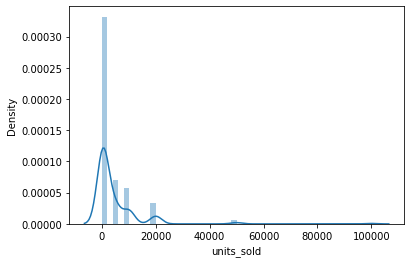

In [ ]:
sns.distplot(df_clean['units_sold'])

In [ ]:
print(df_clean['units_sold'].describe())
print(df_clean['units_sold'].median())

count      1539.000000
mean       4422.480182
std        9438.316389
min           1.000000
25%         100.000000
50%        1000.000000
75%        5000.000000
max      100000.000000
Name: units_sold, dtype: float64
1000.0


##### Encode target
<br>0 - 'low_sales' if 'units_sold' <= 100</br>
<br>1 - 'regular_sales' if 'units_sold' <= 1000</br>
<br>2 - 'high_sales' if  'units_sold' > 1000</br>

In [ ]:
df_clean['target'] = df_clean.units_sold.apply(lambda x: 0 if x <= 100
                                              else 1 if x <= 1000
                                              else 2)

In [ ]:
df_clean['target'].value_counts().sort_index()

0    618
1    403
2    518
Name: target, dtype: int64

In [ ]:
df_clean['target'].value_counts().sort_index()/len(df_clean)

0    0.401559
1    0.261858
2    0.336582
Name: target, dtype: float64

##### Drop 'units_sold' column

In [ ]:
df_clean = df_clean.drop(columns='units_sold')

In [ ]:
df_clean.shape

(1539, 29)

## Final check on Cleaned dataset

##### check data types of features

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1539 non-null   float64
 1   uses_ad_boosts                1539 non-null   int64  
 2   rating                        1539 non-null   float64
 3   rating_count                  1539 non-null   int64  
 4   badges_count                  1539 non-null   int64  
 5   badge_local_product           1539 non-null   int64  
 6   badge_product_quality         1539 non-null   int64  
 7   badge_fast_shipping           1539 non-null   int64  
 8   product_variation_inventory   1539 non-null   int64  
 9   shipping_option_price         1539 non-null   int64  
 10  countries_shipped_to          1539 non-null   int64  
 11  inventory_total               1539 non-null   int64  
 12  has_urgency_banner            1539 non-null   float64
 13  ori

In [ ]:
corr_bf_dummy = df_clean.corr()

<Axes: >

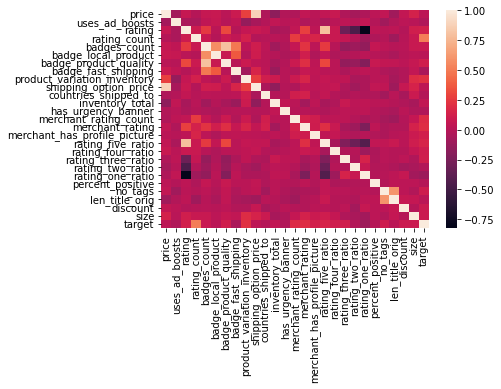

In [ ]:
sns.heatmap(corr_bf_dummy, xticklabels=corr_bf_dummy.columns, yticklabels=corr_bf_dummy.columns,
           #annot=True
           )

#### Perform get dummy

In [ ]:
#df_clean.head(3)

,price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,rating_five_ratio,rating_four_ratio,rating_three_ratio,rating_two_ratio,rating_one_ratio,percent_positive,no_tags,len_title_orig,discount,size,color,target
0,16.0,0,3.76,54,0,0,0,0,50,4,34,50,1.0,CN,568,4.128521,0,0.481481,0.148148,0.185185,0.018519,0.166667,0.0,24,134,1.142857,12.0,white,0
1,8.0,1,3.45,6135,0,0,0,0,50,2,41,50,1.0,CN,17752,3.899673,0,0.369845,0.167400,0.182233,0.104971,0.175550,0.0,15,48,0.363636,2.0,green,2
2,8.0,0,3.57,14,0,0,0,0,1,3,36,50,1.0,CN,295,3.989831,0,0.357143,0.285714,0.142857,0.000000,0.214286,0.0,19,130,0.186047,2.0,Other,0


In [ ]:
cols = ['origin_country', 'color']

In [ ]:
df_clean_dummy = pd.get_dummies(df_clean, prefix=cols, columns=cols, drop_first=True)

In [ ]:
df_clean_dummy.head(3)

,price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,rating_five_ratio,rating_four_ratio,rating_three_ratio,rating_two_ratio,rating_one_ratio,percent_positive,no_tags,len_title_orig,discount,size,target,origin_country_CN,origin_country_GB,origin_country_None,origin_country_SG,origin_country_US,origin_country_VE,color_black,color_blue,color_brown,color_gray,color_green,color_multicolor,color_orange,color_pink,color_purple,color_red,color_silver,color_white,color_yellow
0,16.0,0,3.76,54,0,0,0,0,50,4,34,50,1.0,568,4.128521,0,0.481481,0.148148,0.185185,0.018519,0.166667,0.0,24,134,1.142857,12.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8.0,1,3.45,6135,0,0,0,0,50,2,41,50,1.0,17752,3.899673,0,0.369845,0.167400,0.182233,0.104971,0.175550,0.0,15,48,0.363636,2.0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,8.0,0,3.57,14,0,0,0,0,1,3,36,50,1.0,295,3.989831,0,0.357143,0.285714,0.142857,0.000000,0.214286,0.0,19,130,0.186047,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# check
df_clean_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1539 non-null   float64
 1   uses_ad_boosts                1539 non-null   int64  
 2   rating                        1539 non-null   float64
 3   rating_count                  1539 non-null   int64  
 4   badges_count                  1539 non-null   int64  
 5   badge_local_product           1539 non-null   int64  
 6   badge_product_quality         1539 non-null   int64  
 7   badge_fast_shipping           1539 non-null   int64  
 8   product_variation_inventory   1539 non-null   int64  
 9   shipping_option_price         1539 non-null   int64  
 10  countries_shipped_to          1539 non-null   int64  
 11  inventory_total               1539 non-null   int64  
 12  has_urgency_banner            1539 non-null   float64
 13  mer

In [ ]:
df_clean_dummy.shape

(1539, 46)

##### Heatmap on dummyied dataset

In [ ]:
corr_dummy = df_clean_dummy.corr()

In [ ]:
corr_dummy

,price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,rating_five_ratio,rating_four_ratio,rating_three_ratio,rating_two_ratio,rating_one_ratio,percent_positive,no_tags,len_title_orig,discount,size,target,origin_country_CN,origin_country_GB,origin_country_None,origin_country_SG,origin_country_US,origin_country_VE,color_black,color_blue,color_brown,color_gray,color_green,color_multicolor,color_orange,color_pink,color_purple,color_red,color_silver,color_white,color_yellow
price,1.000000,-0.077337,0.067537,-0.006073,0.067983,0.069185,0.015044,0.087288,0.272531,0.872815,-0.032006,-0.169302,-0.024016,-0.024114,0.045666,0.017536,0.044749,0.070841,-0.030774,-0.069694,-0.037193,0.024333,0.044214,-0.093745,0.052927,0.136683,0.023554,0.016199,0.004169,-0.070057,-0.045610,0.037909,0.010487,0.049746,0.030491,0.009680,-0.075953,-0.049915,0.066845,-0.017582,-0.029980,-0.045858,0.020104,-0.017015,-0.032178,-0.001727
uses_ad_boosts,-0.077337,1.000000,-0.051922,-0.047968,0.038083,0.061252,0.001482,0.037949,-0.138270,-0.065574,-0.015790,0.043264,0.011260,0.029235,-0.029324,0.003340,-0.051330,0.014115,0.031968,0.002489,0.043678,-0.012267,-0.088857,-0.023176,0.022950,0.005717,-0.031203,-0.007201,0.029001,-0.038445,0.041028,0.004515,0.058060,0.008086,0.015827,0.019071,0.024785,0.035212,-0.014841,-0.029191,0.001145,-0.021034,-0.032383,0.004656,-0.026371,0.026701
rating,0.067537,-0.051922,1.000000,0.090187,0.241320,0.015546,0.310005,-0.007348,0.060626,0.077246,0.050055,-0.063870,-0.042522,0.041168,0.271389,0.030740,0.792889,0.077604,-0.309124,-0.463291,-0.820615,0.032741,0.015496,0.028414,-0.011661,0.115557,0.124475,0.032066,0.013088,-0.021768,0.016973,0.003081,-0.101504,0.063819,-0.048858,-0.021395,0.029692,-0.027901,0.086079,-0.055200,-0.075227,0.063156,-0.028833,0.044354,-0.008747,-0.057268
rating_count,-0.006073,-0.047968,0.090187,1.000000,0.078027,-0.003517,0.084684,0.043843,0.131005,-0.010887,-0.001803,0.008717,-0.008576,0.257581,0.138841,0.153384,0.075669,0.081192,0.055644,-0.012466,-0.100755,-0.037717,-0.003074,-0.095328,-0.001543,0.072659,0.507970,0.024693,-0.008402,0.035893,-0.000566,-0.046481,-0.022886,0.083390,-0.034710,-0.021962,0.042428,-0.035354,0.013898,0.008556,-0.054142,0.014677,-0.039340,-0.015023,0.003290,-0.057012
badges_count,0.067983,0.038083,0.241320,0.078027,1.000000,0.572322,0.798072,0.484876,0.032078,0.110882,0.023092,-0.094142,-0.027144,0.056616,0.219353,0.022439,0.250313,0.003168,-0.138611,-0.104789,-0.146843,0.060697,0.019334,-0.001583,0.009398,0.071195,0.076772,0.008452,-0.007903,-0.031766,-0.011180,0.023233,-0.015821,0.042037,-0.055223,0.012946,0.044997,-0.014785,0.075399,-0.029946,-0.015994,0.012033,-0.028360,-0.011180,-0.018446,-0.044960
badge_local_product,0.069185,0.061252,0.015546,-0.003517,0.572322,1.000000,0.070285,0.363850,-0.011493,0.100827,0.016598,-0.008681,-0.039669,-0.010431,0.117300,-0.030295,0.047265,-0.032765,-0.026885,-0.008619,0.015208,0.001481,-0.021982,-0.051386,0.000336,0.021816,0.016089,0.026679,-0.003534,-0.014204,-0.004999,-0.019870,-0.007074,-0.008743,-0.031340,0.039425,-0.011599,-0.008899,0.037186,-0.019540,-0.018547,0.024806,0.004379,-0.004999,0.016431,-0.017992
badge_product_quality,0.015044,0.001482,0.310005,0.084684,0.798072,0.070285,1.000000,0.011359,0.085669,0.027397,0.012891,-0.066276,-0.014382,0.088748,0.196761,0.030431,0.296687,0.015905,-0.150137,-0.133605,-0.212018,0.073411,0.048864,0.045934,0.022473,0.062308,0.117025,0.000990,-0.007212,-0.028990,-0.010203,0.030088,-0.014438,0.052854,-0.038946,-0.026106,0.065463,-0.025748,0.066577,-0.039881,0.002187,0.012375,-0.031770,-0.010203,-0.024126,-0.045965
badge_fast_shipping,0.087288,0.037949,-0.007348,0.043843,0.484876,0.363850,0.011359,1.000000,-0.087508,0.150178,0.019944,-0.120391,-0.001021,-0.021861,0.0660

<Axes: >

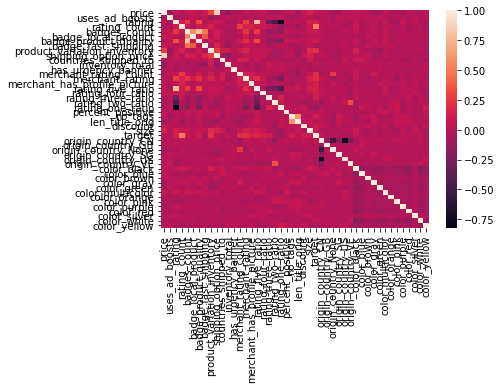

In [ ]:
sns.heatmap(corr_dummy, xticklabels=corr_dummy.columns, yticklabels=corr_dummy.columns,
           )

## Dataset Information

<br><b>'price'</b>: selling price you would pay to get the product</br>
<br><b>'uses_ad_boosts'</b>: Whether the seller paid to boost his product within the platform</br>
<br><b>'rating'</b>: Mean product rating</br>
<br><b>'rating_count'</b>: Total number of ratings of the product</br>
<br><b>'badges_count'</b>: Number of service badges the product or the seller have</br>
<br><b>'badge_local_product'</b>: Boolean. A badge that denotes the product is a local product.</br>
<br><b>'badge_product_quality'</b>: Boolean. Badge awarded when many buyers consistently gave good evaluations </br>
<br><b>'badge_fast_shipping'</b>: Boolean. Badge awarded when this product's order is consistently shipped rapidly</br>
<br><b>'product_variation_inventory'</b>: Inventory the seller has. </br>
<br><b>'shipping_option_price'</b>: shipping price</br>
<br><b>'countries_shipped_to'</b>: Number of countries this product is shipped to.</br>
<br><b>'inventory_total'</b>: Total inventory </br>
<br><b>'has_urgency_banner'</b>: Boolean. whether there was an urgency banner with an urgency</br>
<br><b>'origin_country'</b>: Origin country the product is from </br>
<br><b>'merchant_rating_count'</b>: Number of ratings of the seller</br>
<br><b>'merchant_rating'</b>: Mean merchant's rating</br>
<br><b>'merchant_has_profile_picture'</b>: Boolean.  whether there is a `merchant_profile_picture` </br>
<br><b>'rating_five_ratio'</b>: Ratio of five star counts/total rating counts</br>
<br><b>'rating_four_ratio'</b>: Ratio of four star counts/total rating counts</br>
<br><b>'rating_three_ratio'</b>: Ratio of three star counts/total rating counts</br>
<br><b>'rating_two_ratio'</b>: Ratio of two star counts/total rating counts</br>
<br><b>'rating_one_ratio'</b>: Ratio of one star counts/total rating counts</br>
<br><b>'percent_positive'</b>: Positive percentage of the rating </br>
<br><b>'no_tags'</b>: Number of tags the product has </br>
<br><b>'len_title_orig'</b>: Length of the product's English title</br>
<br><b>'discount'</b>: price/Retail price </br>
<br><b>'size'</b>: (Converted to dummy variables)</br>
<br><b>'color'</b>: (Converted to dummy variables)</br>
<br><b>'target'</b>: The target column of unit_sold</br>

# Feature Engineering

## Split dataset to Train and Test

In [ ]:
X = df_clean_dummy.drop(columns='target')
y = df_clean_dummy['target']

In [ ]:
X.columns

Index(['price', 'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'rating_five_ratio',
       'rating_four_ratio', 'rating_three_ratio', 'rating_two_ratio',
       'rating_one_ratio', 'percent_positive', 'no_tags', 'len_title_orig',
       'discount', 'size', 'origin_country_CN', 'origin_country_GB',
       'origin_country_None', 'origin_country_SG', 'origin_country_US',
       'origin_country_VE', 'color_black', 'color_blue', 'color_brown',
       'color_gray', 'color_green', 'color_multicolor', 'color_orange',
       'color_pink', 'color_purple', 'color_red', 'color_silver',
       'color_white', 'color_yellow'],
      dtype='object')

In [ ]:
len(X.columns)
y.value_counts()

45

0    618
2    518
1    403
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Scale dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled
X_test_scaled

array([[-0.59703164, -0.87529458, -0.576262  , ..., -0.0285133 ,
        -0.44960921, -0.26539552],
       [-0.34426443,  1.14247251,  0.05290937, ..., -0.0285133 ,
         2.22415375, -0.26539552],
       [ 0.66680443,  1.14247251,  0.66987928, ..., -0.0285133 ,
        -0.44960921, -0.26539552],
       ...,
       [-0.84979885, -0.87529458,  0.30463097, ..., -0.0285133 ,
        -0.44960921, -0.26539552],
       [-0.59703164, -0.87529458,  0.06829383, ..., -0.0285133 ,
        -0.44960921, -0.26539552],
       [-0.09149721,  1.14247251,  0.43354214, ..., -0.0285133 ,
        -0.44960921, -0.26539552]])

array([[-0.84979885,  1.14247251, -1.09190667, ..., -0.0285133 ,
        -0.44960921, -0.26539552],
       [ 0.16127   ,  1.14247251,  1.50780186, ..., -0.0285133 ,
         2.22415375, -0.26539552],
       [ 0.16127   ,  1.14247251, -0.59774719, ..., -0.0285133 ,
        -0.44960921, -0.26539552],
       ...,
       [-0.63241905, -0.87529458,  1.03512758, ..., -0.0285133 ,
        -0.44960921, -0.26539552],
       [-0.59703164, -0.87529458, -1.3282438 , ..., -0.0285133 ,
        -0.44960921, -0.26539552],
       [-0.34426443, -0.87529458,  1.14255356, ..., -0.0285133 ,
         2.22415375, -0.26539552]])

## Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the train set
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
y_train.value_counts()
y_train_SMOTE.value_counts()

0    494
2    414
1    323
Name: target, dtype: int64

1    494
0    494
2    494
Name: target, dtype: int64

In [ ]:
X_train_SMOTE.shape

(1482, 45)

# Model Selection

## Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

### Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=764, random_state=42, n_jobs=-1)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=764, n_jobs=-1, random_state=42)

In [ ]:
y_pred_rfc = rfc.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_rfc)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       124
           1       0.72      0.79      0.75        80
           2       0.90      0.84      0.87       104

    accuracy                           0.87       308
   macro avg       0.85      0.86      0.85       308
weighted avg       0.87      0.87      0.87       308



##### Balanced

In [ ]:
rfc_balanced = RandomForestClassifier(n_estimators=764, class_weight='balanced', random_state=42, n_jobs=-1)
rfc_balanced.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=764, n_jobs=-1,
                       random_state=42)

In [ ]:
y_pred_rfc_balanced = rfc_balanced.predict(X_test_scaled)

In [ ]:
report = classification_report(y_test, y_pred_rfc_balanced)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       124
           1       0.72      0.80      0.76        80
           2       0.90      0.83      0.86       104

    accuracy                           0.87       308
   macro avg       0.86      0.86      0.85       308
weighted avg       0.87      0.87      0.87       308



##### Class weights

Since we have a weak class - 'class 1', so we added more weight on that class 

In [ ]:
class_weights = {0: 1, 1:3, 2: 2}

In [ ]:
rfc_weighted = RandomForestClassifier(n_estimators=764, class_weight=class_weights, random_state=42, n_jobs=-1)
rfc_weighted.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3, 2: 2}, n_estimators=764,
                       n_jobs=-1, random_state=42)

In [ ]:
rfc_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3, 2: 2}, n_estimators=764,
                       n_jobs=-1, random_state=42)

In [ ]:
y_pred_rfc_weighted = rfc_weighted.predict(X_test_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_rfc_weighted_unscaled = rfc_weighted.predict(X_test)

In [ ]:
# unscaled
report = classification_report(y_test, y_pred_rfc_weighted_unscaled)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       124
           1       0.72      0.81      0.76        80
           2       0.91      0.83      0.86       104

    accuracy                           0.87       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.88      0.87      0.87       308



##### Class weights on oversampled data

In [ ]:
col_names = X.columns

In [ ]:
X_train_SMOTE_df = pd.DataFrame(X_train_SMOTE, columns=col_names)

In [ ]:
rfc_weighted.fit(X_train_SMOTE_df, y_train_SMOTE)

RandomForestClassifier(class_weight={0: 1, 1: 3, 2: 2}, n_estimators=764,
                       n_jobs=-1, random_state=42)

In [ ]:
y_pred_rfc_weighted_SMOTE = rfc_weighted.predict(X_test_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
report = classification_report(y_test, y_pred_rfc_weighted_SMOTE)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       124
           1       0.72      0.85      0.78        80
           2       0.93      0.82      0.87       104

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.86       308
weighted avg       0.88      0.87      0.88       308



In [ ]:
rfc_weighted.score(X_train_SMOTE_df, y_train_SMOTE)

1.0

In [ ]:
rfc_weighted.score(X_test_scaled, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8733766233766234

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

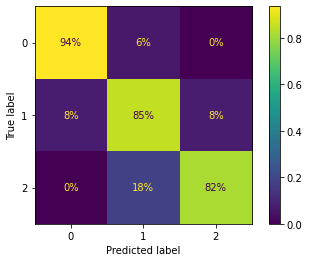

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc_weighted_SMOTE,
                                        normalize="true", values_format=".0%")
plt.show()

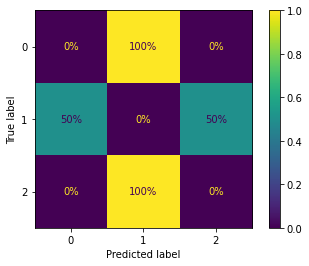

In [ ]:
sample_weight = (y_test != y_pred_rfc_weighted_SMOTE)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc_weighted_SMOTE,
                                        normalize="true", sample_weight = sample_weight, values_format=".0%")
plt.show()

#### OVR Random Forest

In [ ]:
ovr_rfc = OneVsRestClassifier(rfc)
ovr_rfc.fit(X_train_scaled, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=764,
                                                     n_jobs=-1,
                                                     random_state=42))

In [ ]:
# 700 estimator: 0.6396103896103896

#accuracy = ovr_rfc.score(X_test_scaled, y_test)
#accuracy

In [ ]:
# 764 estimator
accuracy = ovr_rfc.score(X_test_scaled, y_test)
accuracy

0.8636363636363636

In [ ]:
# 800 estimator : 0.6428571428571429

In [ ]:
y_pred_ovrRfc = ovr_rfc.predict(X_test_scaled)

In [ ]:
report = classification_report(y_test, y_pred_ovrRfc)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       124
           1       0.72      0.78      0.75        80
           2       0.90      0.83      0.86       104

    accuracy                           0.86       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.87      0.86      0.86       308



##### on smote random forest

In [ ]:
ovr_rfc_smote = OneVsRestClassifier(rfc)
ovr_rfc_smote.fit(X_train_SMOTE_df, y_train_SMOTE)

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=764,
                                                     n_jobs=-1,
                                                     random_state=42))

In [ ]:
ovr_rfc_smote.score(X_test_scaled, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8668831168831169

In [ ]:
y_pred_ovrRfc_smote = ovr_rfc_smote.predict(X_test_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
report = classification_report(y_test, y_pred_ovrRfc_smote)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       124
           1       0.71      0.81      0.76        80
           2       0.90      0.82      0.86       104

    accuracy                           0.87       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.87      0.87      0.87       308



##### ON WEIGHTED

In [ ]:
ovr_rfc_smote_weighted = OneVsRestClassifier(rfc_weighted)
ovr_rfc_smote_weighted.fit(X_train_SMOTE_df, y_train_SMOTE)

OneVsRestClassifier(estimator=RandomForestClassifier(class_weight={0: 1, 1: 3,
                                                                   2: 2},
                                                     n_estimators=764,
                                                     n_jobs=-1,
                                                     random_state=42))

In [ ]:
ovr_rfc_smote_weighted.score(X_test_scaled, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8668831168831169

#### OVO Random Forest

In [ ]:
ovo_rfc = OneVsOneClassifier(rfc)
ovo_rfc.fit(X_train_scaled, y_train)

OneVsOneClassifier(estimator=RandomForestClassifier(n_estimators=764, n_jobs=-1,
                                                    random_state=42))

In [ ]:
accuracy = ovo_rfc.score(X_test_scaled, y_test)
accuracy

0.8571428571428571

In [ ]:
y_pred_ovoRfc = ovo_rfc.predict(X_test_scaled)

In [ ]:
report = classification_report(y_test, y_pred_ovoRfc)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       124
           1       0.70      0.78      0.74        80
           2       0.89      0.81      0.85       104

    accuracy                           0.86       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.86      0.86      0.86       308



### Multinomial Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [ ]:
logreg.fit(X_train_scaled, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred_lr = logreg.predict(X_test_scaled)

In [ ]:
accuracy = logreg.score(X_test_scaled, y_test)
f1 = f1_score(y_test, y_pred_lr, average=None)

In [ ]:
accuracy
f1

0.7467532467532467

array([0.83453237, 0.48648649, 0.82105263])

In [ ]:
report = classification_report(y_test, y_pred_lr)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       124
           1       0.53      0.45      0.49        80
           2       0.91      0.75      0.82       104

    accuracy                           0.75       308
   macro avg       0.73      0.71      0.71       308
weighted avg       0.75      0.75      0.74       308



##### On Smote

In [ ]:
logreg.fit(X_train_SMOTE_df, y_train_SMOTE)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred_lr_smote = logreg.predict(X_test_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
report = classification_report(y_test, y_pred_lr_smote)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       124
           1       0.54      0.60      0.57        80
           2       0.92      0.74      0.82       104

    accuracy                           0.76       308
   macro avg       0.75      0.74      0.74       308
weighted avg       0.77      0.76      0.76       308



#### OVR

In [ ]:
ovr_lr = OneVsRestClassifier(logreg)
ovr_lr.fit(X_train_scaled, y_train)

OneVsRestClassifier(estimator=LogisticRegression(multi_class='multinomial'))

In [ ]:
# 764 estimator
accuracy = ovr_lr.score(X_test_scaled, y_test)
accuracy

0.7532467532467533

In [ ]:
y_pred_ovrLr = ovr_lr.predict(X_test_scaled)

In [ ]:
report = classification_report(y_test, y_pred_ovrLr)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       124
           1       0.61      0.35      0.44        80
           2       0.89      0.87      0.88       104

    accuracy                           0.75       308
   macro avg       0.74      0.71      0.71       308
weighted avg       0.74      0.75      0.73       308



### Kernel SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

#### OVR

In [ ]:
ovr_svc = OneVsRestClassifier(SVC(kernel='rbf',C=10, gamma=0.1, random_state=42))
ovr_svc.fit(X_train_scaled, y_train)

OneVsRestClassifier(estimator=SVC(C=10, gamma=0.1, random_state=42))

In [ ]:
len(ovr_svc.estimators_)

3

In [ ]:
accuracy = ovr_svc.score(X_test_scaled, y_test)
accuracy

0.672077922077922

In [ ]:
y_pred_ovrSvc = ovr_svc.predict(X_test_scaled)

In [ ]:
f1 = f1_score(y_test, y_pred_ovrSvc, average=None)
f1

array([0.74725275, 0.52348993, 0.68041237])

In [ ]:
report = classification_report(y_test, y_pred_ovrSvc)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.82      0.75       124
           1       0.57      0.49      0.52        80
           2       0.73      0.63      0.68       104

    accuracy                           0.67       308
   macro avg       0.66      0.65      0.65       308
weighted avg       0.67      0.67      0.67       308



#### OVO

In [ ]:
ovo_svc = OneVsOneClassifier(SVC(kernel='rbf',C=10, gamma=0.1, random_state=42))
ovo_svc.fit(X_train_scaled, y_train)

OneVsOneClassifier(estimator=SVC(C=10, gamma=0.1, random_state=42))

In [ ]:
accuracy = ovo_svc.score(X_test_scaled, y_test)
accuracy

0.6590909090909091

In [ ]:
y_pred_ovoSvc = ovo_svc.predict(X_test_scaled)

In [ ]:
f1 = f1_score(y_test, y_pred_ovoSvc, average=None)
f1

array([0.74021352, 0.48951049, 0.66666667])

In [ ]:
report = classification_report(y_test, y_pred_ovoSvc)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       124
           1       0.56      0.44      0.49        80
           2       0.73      0.62      0.67       104

    accuracy                           0.66       308
   macro avg       0.65      0.63      0.63       308
weighted avg       0.66      0.66      0.65       308



### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
xgb_model = XGBClassifier(max_depth=5, n_estimators=500, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Scaled : Accuracy Score 65.58

accuracy = accuracy_score(y_test, y_pred_xgb)
print('Accuracy Score %.2f' % (accuracy*100))

Accuracy Score 86.04


In [ ]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print('Accuracy Score %.2f' % (accuracy*100))

Accuracy Score 86.04


In [ ]:
report = classification_report(y_test, y_pred_xgb)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       124
           1       0.71      0.79      0.75        80
           2       0.90      0.82      0.86       104

    accuracy                           0.86       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.87      0.86      0.86       308



##### On Smote

In [ ]:
xgb_model.fit(X_train_SMOTE_df, y_train_SMOTE)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred_xgb_smote = xgb_model.predict(X_test_scaled)

In [ ]:
report = classification_report(y_test, y_pred_xgb_smote)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       124
           1       0.73      0.80      0.76        80
           2       0.91      0.84      0.87       104

    accuracy                           0.87       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.87      0.87      0.87       308



### Stacking

In [ ]:
#%pip install mlxtend --upgrade

In [ ]:
from mlxtend.classifier import StackingClassifier

In [ ]:
# define each model 

rfc_stack = OneVsRestClassifier(RandomForestClassifier(n_estimators=764, random_state=42, n_jobs=-1))
xgb_stack = XGBClassifier(max_depth=5, n_estimators=500, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)
#NB_stack = GaussianNB() 
#svm_stack = svm.SVC()
#logreg_stack = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#rfc_stack2 = OneVsOneClassifier(RandomForestClassifier(n_estimators=764, random_state=42, n_jobs=-1))

In [ ]:
stack_model = StackingClassifier(classifiers =[rfc_stack, xgb_stack], meta_classifier = xgb_stack, use_probas = True, \
                               use_features_in_secondary = True)

In [ ]:
stack_model_2 = StackingClassifier(classifiers =[xgb_stack, rfc_stack], meta_classifier = xgb_stack, use_probas = True, \
                               use_features_in_secondary = True)

In [ ]:
stack_model.fit(X_train, y_train)

StackingClassifier(classifiers=[OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=764,
                                                                                     n_jobs=-1,
                                                                                     random_state=42)),
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=No...
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=5, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=500, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None, ...),
                   use_features_in_secondary=True, use_probas=True)

In [ ]:
stack_model_2.fit(X_train, y_train)

StackingClassifier(classifiers=[XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0....
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=5, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=500, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None, ...),
                   use_features_in_secondary=True, use_probas=True)

In [ ]:
y_pred_stack = stack_model.predict(X_test)

In [ ]:
y_pred_stack_2 = stack_model_2.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred_stack)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       124
           1       0.70      0.80      0.75        80
           2       0.89      0.81      0.85       104

    accuracy                           0.86       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.87      0.86      0.86       308



In [ ]:
report = classification_report(y_test, y_pred_stack_2)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       124
           1       0.70      0.79      0.74        80
           2       0.90      0.82      0.86       104

    accuracy                           0.86       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.86      0.86      0.86       308



## Regression Approach

In [ ]:
clean_df = pd.read_excel('/content/drive/Shareddrives/MSIS2631-Machine Learning/Final Project_Wish/Final_cleaned_data.xlsx')

In [ ]:
clean_df.head(2)

,price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,rating_five_ratio,rating_four_ratio,rating_three_ratio,rating_two_ratio,rating_one_ratio,percent_positive,no_tags,len_title_orig,discount,size,color
0,16.0,100,0,3.76,54,0,0,0,0,50,4,34,50,1,CN,568,4.128521,0,0.481481,0.148148,0.185185,0.018519,0.166667,0.0,24,134,1.142857,12,white
1,8.0,20000,1,3.45,6135,0,0,0,0,50,2,41,50,1,CN,17752,3.899673,0,0.369845,0.167400,0.182233,0.104971,0.175550,0.0,15,48,0.363636,2,green


In [ ]:
clean_df.head(3)
cols = ['origin_country', 'color']
df_clean_dummy = pd.get_dummies(clean_df, prefix=cols, columns=cols, drop_first=True)
df_clean_dummy.head(3)
# check
df_clean_dummy.info()
df_clean_dummy.shape

,price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,rating_five_ratio,rating_four_ratio,rating_three_ratio,rating_two_ratio,rating_one_ratio,percent_positive,no_tags,len_title_orig,discount,size,color
0,16.0,100,0,3.76,54,0,0,0,0,50,4,34,50,1,CN,568,4.128521,0,0.481481,0.148148,0.185185,0.018519,0.166667,0.0,24,134,1.142857,12,white
1,8.0,20000,1,3.45,6135,0,0,0,0,50,2,41,50,1,CN,17752,3.899673,0,0.369845,0.167400,0.182233,0.104971,0.175550,0.0,15,48,0.363636,2,green
2,8.0,100,0,3.57,14,0,0,0,0,1,3,36,50,1,CN,295,3.989831,0,0.357143,0.285714,0.142857,0.000000,0.214286,0.0,19,130,0.186047,2,Other


,price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,rating_five_ratio,rating_four_ratio,rating_three_ratio,rating_two_ratio,rating_one_ratio,percent_positive,no_tags,len_title_orig,discount,size,origin_country_CN,origin_country_GB,origin_country_None,origin_country_SG,origin_country_US,origin_country_VE,color_black,color_blue,color_brown,color_gray,color_green,color_multicolor,color_orange,color_pink,color_purple,color_red,color_silver,color_white,color_yellow
0,16.0,100,0,3.76,54,0,0,0,0,50,4,34,50,1,568,4.128521,0,0.481481,0.148148,0.185185,0.018519,0.166667,0.0,24,134,1.142857,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8.0,20000,1,3.45,6135,0,0,0,0,50,2,41,50,1,17752,3.899673,0,0.369845,0.167400,0.182233,0.104971,0.175550,0.0,15,48,0.363636,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,8.0,100,0,3.57,14,0,0,0,0,1,3,36,50,1,295,3.989831,0,0.357143,0.285714,0.142857,0.000000,0.214286,0.0,19,130,0.186047,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1539 non-null   float64
 1   units_sold                    1539 non-null   int64  
 2   uses_ad_boosts                1539 non-null   int64  
 3   rating                        1539 non-null   float64
 4   rating_count                  1539 non-null   int64  
 5   badges_count                  1539 non-null   int64  
 6   badge_local_product           1539 non-null   int64  
 7   badge_product_quality         1539 non-null   int64  
 8   badge_fast_shipping           1539 non-null   int64  
 9   product_variation_inventory   1539 non-null   int64  
 10  shipping_option_price         1539 non-null   int64  
 11  countries_shipped_to          1539 non-null   int64  
 12  inventory_total               1539 non-null   int64  
 13  has

(1539, 46)

In [ ]:
df_clean_dummy.head(3)

,price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,rating_five_ratio,rating_four_ratio,rating_three_ratio,rating_two_ratio,rating_one_ratio,percent_positive,no_tags,len_title_orig,discount,size,origin_country_CN,origin_country_GB,origin_country_None,origin_country_SG,origin_country_US,origin_country_VE,color_black,color_blue,color_brown,color_gray,color_green,color_multicolor,color_orange,color_pink,color_purple,color_red,color_silver,color_white,color_yellow
0,16.0,100,0,3.76,54,0,0,0,0,50,4,34,50,1,568,4.128521,0,0.481481,0.148148,0.185185,0.018519,0.166667,0.0,24,134,1.142857,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8.0,20000,1,3.45,6135,0,0,0,0,50,2,41,50,1,17752,3.899673,0,0.369845,0.167400,0.182233,0.104971,0.175550,0.0,15,48,0.363636,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,8.0,100,0,3.57,14,0,0,0,0,1,3,36,50,1,295,3.989831,0,0.357143,0.285714,0.142857,0.000000,0.214286,0.0,19,130,0.186047,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_clean_dummy.units_sold.value_counts()

100       493
1000      403
5000      216
10000     176
20000     103
50         68
10         44
50000      17
100000      6
1           3
8           3
7           2
2           2
3           2
6           1
Name: units_sold, dtype: int64

<Axes: xlabel='units_sold', ylabel='count'>

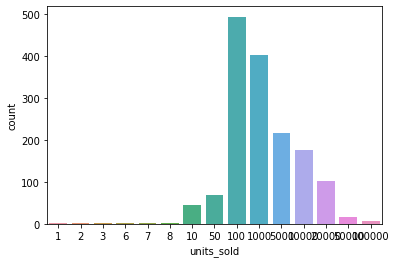

In [ ]:
sns.countplot(x = df_clean_dummy.units_sold)

### Train_test_split

In [ ]:
X = df_clean_dummy.drop(columns= 'units_sold')
y = df_clean_dummy['units_sold']

In [ ]:
X.columns

Index(['price', 'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'rating_five_ratio',
       'rating_four_ratio', 'rating_three_ratio', 'rating_two_ratio',
       'rating_one_ratio', 'percent_positive', 'no_tags', 'len_title_orig',
       'discount', 'size', 'origin_country_CN', 'origin_country_GB',
       'origin_country_None', 'origin_country_SG', 'origin_country_US',
       'origin_country_VE', 'color_black', 'color_blue', 'color_brown',
       'color_gray', 'color_green', 'color_multicolor', 'color_orange',
       'color_pink', 'color_purple', 'color_red', 'color_silver',
       'color_white', 'color_yellow'],
      dtype='object')

####Scale dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42,shuffle=True)

# standardize the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled.columns = X_train.columns

X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_test_scaled.columns = X_test.columns

X_train_scaled.head()

,price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,rating_five_ratio,rating_four_ratio,rating_three_ratio,rating_two_ratio,rating_one_ratio,percent_positive,no_tags,len_title_orig,discount,size,origin_country_CN,origin_country_GB,origin_country_None,origin_country_SG,origin_country_US,origin_country_VE,color_black,color_blue,color_brown,color_gray,color_green,color_multicolor,color_orange,color_pink,color_purple,color_red,color_silver,color_white,color_yellow
0,-0.589493,-0.886931,1.036995,-0.381856,-0.310558,-0.121816,-0.284205,-0.107255,0.794985,-0.341073,0.158916,0.071371,-0.66696,-0.017652,-0.868375,-0.408442,1.037798,-0.486064,0.342665,-0.732747,-0.735807,-0.175857,0.137934,0.099712,-1.495450,-0.447187,0.20576,-0.028513,-0.107255,-0.04034,-0.152562,-0.057096,-0.508617,-0.346568,-0.094955,-0.228335,-0.305369,4.714490,-0.143978,-0.270619,-0.190251,-0.321009,-0.04034,-0.443066,-0.261871
1,3.453254,1.127483,-0.852260,-0.181808,-0.310558,-0.121816,-0.284205,-0.107255,0.794985,2.601875,-0.253687,0.071371,1.49934,-0.211674,0.572825,-0.408442,-0.570246,-0.122783,0.415084,0.246138,0.786591,-0.175857,1.343878,0.556988,-1.489295,1.871198,0.20576,-0.028513,-0.107255,-0.04034,-0.152562,-0.057096,-0.508617,-0.346568,-0.094955,-0.228335,-0.305369,-0.212112,-0.143978,-0.270619,-0.190251,-0.321009,-0.04034,2.257002,-0.261871
2,-0.336821,1.127483,0.848069,0.228095,-0.310558,-0.121816,-0.284205,-0.107255,-1.087442,-0.341073,0.158916,0.071371,1.49934,0.181427,0.363306,-0.408442,0.763325,0.174096,-0.302039,-0.305167,-0.657923,-0.175857,2.791010,1.308226,0.093696,-0.447187,0.20576,-0.028513,-0.107255,-0.04034,-0.152562,-0.057096,-0.508617,-0.346568,-0.094955,-0.228335,3.274723,-0.212112,-0.143978,-0.270619,-0.190251,-0.321009,-0.04034,-0.443066,-0.261871
3,-1.125157,-0.886931,-0.264492,-0.160724,-0.310558,-0.121816,-0.284205,-0.107255,0.794985,-1.322055,0.055765,0.071371,-0.66696,0.092910,-0.080578,2.448330,-0.204585,-0.026457,0.586470,0.026945,0.154267,-0.175857,-1.309198,-0.520876,0.089351,-0.447187,0.20576,-0.028513,-0.107255,-0.04034,-0.152562,-0.057096,-0.508617,-0.346568,-0.094955,-0.228335,-0.305369,-0.212112,-0.143978,-0.270619,-0.190251,3.115180,-0.04034,-0.443066,-0.261871
4,-0.647607,1.127483,0.449227,-0.445597,-0.310558,-0.121816,-0.284205,-0.107255,0.559682,-1.322055,-0.459989,0.071371,1.49934,-0.215713,-0.598301,-0.408442,-1.231187,3.881372,1.459968,-0.926310,-1.244793,-0.175857,0.620311,-0.618864,1.013332,-0.447187,0.20576,-0.028513,-0.107255,-0.04034,-0.152562,-0.057096,-0.508617,-0.346568,-0.094955,-0.228335,3.274723,-0.212112,-0.143978,-0.270619,-0.190251,-0.321009,-0.04034,-0.443066,-0.261871


#### Feature Selection with Random Forest

In [ ]:
#Feature importance with Random Forest 

from sklearn.ensemble import RandomForestRegressor

features = pd.DataFrame(X_train_scaled.columns[1:])
forest = RandomForestRegressor(n_estimators = 500,
                               random_state = 0,
                               n_jobs = -1)
#fit all the columns
forest.fit(X_train, y_train)
importances = pd.DataFrame(forest.feature_importances_)

rf_importances = features.merge(importances,left_index = True, right_index = True)
rf_importances.columns = ['features','rf_importance']
rf_importances.sort_values('rf_importance', ascending = False, inplace = True) 
rf_importances['rf_rank'] = range(1, len(rf_importances) + 1)

top_vars = rf_importances.iloc[:15,0].tolist()
X_train_top = X_train_scaled[top_vars]
X_test_top = X_test_scaled[top_vars]

rf_importances=rf_importances[rf_importances['rf_rank'] <=15]
rf_importances

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)

,features,rf_importance,rf_rank
3,badges_count,0.861223,1
14,merchant_has_profile_picture,0.018827,2
13,merchant_rating,0.015450,3
0,uses_ad_boosts,0.015080,4
17,rating_three_ratio,0.009285,5
24,size,0.008872,6
20,percent_positive,0.007884,7
10,inventory_total,0.006986,8
9,countries_shipped_to,0.006960,9
23,discount,0.006349,10


In [ ]:
#Check the first row of top 15 features fro both train and test
X_train_top.head(1)
X_test_top.head(1)

,badges_count,merchant_has_profile_picture,merchant_rating,uses_ad_boosts,rating_three_ratio,size,percent_positive,inventory_total,countries_shipped_to,discount,shipping_option_price,rating_two_ratio,len_title_orig,rating_one_ratio,rating_count
0,-0.310558,-0.408442,-0.868375,-0.886931,0.342665,-0.447187,-0.175857,0.071371,0.158916,-1.49545,-0.341073,-0.732747,0.099712,-0.735807,-0.381856


,badges_count,merchant_has_profile_picture,merchant_rating,uses_ad_boosts,rating_three_ratio,size,percent_positive,inventory_total,countries_shipped_to,discount,shipping_option_price,rating_two_ratio,len_title_orig,rating_one_ratio,rating_count
0,2.772478,-0.408442,0.611331,1.127483,-0.529106,1.871198,-0.175857,0.071371,0.210491,0.986094,-0.341073,-0.395452,-0.553538,-0.634074,1.085656


#### Model Fitting to all features

###### Linear Regression

In [ ]:
from sklearn import linear_model
import sklearn.metrics as met

#OLS_1 is the object of all features
OLS_1 = linear_model.LinearRegression()

OLS_1.fit(X_train_scaled, y_train)
print("OLS.intercept_:", OLS_1.intercept_)
print("OLS.coef_:", OLS_1.coef_)
y_pred = OLS_1.predict(X_test_scaled)

#scores correspond to R^2. Discussed more below
print("Training set score: {:.4f}".format(OLS_1.score(X_train_scaled, y_train)))
print("Test set score: {:.4f}".format(OLS_1.score(X_test_scaled, y_test)))
print('Variance score (R-squared): %.4f' % met.r2_score(y_test, y_pred))
print(met.mean_squared_error(y_test,y_pred))
print(met.mean_absolute_error(y_test,y_pred))

LinearRegression()

OLS.intercept_: 4416.987041648702
OLS.coef_: [-5.42018337e+01  2.19155625e+02  2.91169122e+04  8.51070626e+03
  8.30750510e+15 -3.07438105e+15 -6.73514294e+15 -2.71581604e+15
  2.11866747e+02 -1.56134253e+02 -1.94339619e+02 -1.66161120e+02
 -1.44288869e+02  3.85629194e+02 -6.02366074e+01  7.00704705e+01
 -1.18392376e+04 -9.21893072e+02  3.93039697e+03  8.67669238e+03
  1.77188732e+04  1.59618706e+01  8.36079596e+01  2.08343656e+02
  1.10728568e+02  2.47987057e+02 -3.63891516e+02 -5.22692100e+01
 -3.24063235e+02  1.28197595e+02 -2.52350842e+02 -1.64853550e+02
  1.69119734e+02  2.48511253e+02  9.21759988e+01  1.92066409e+02
  3.32120465e+02  9.53739475e+01  4.46286497e+02  2.08942410e+02
  2.98772779e+02  1.96971678e+02 -1.60092240e+01  3.49855724e+02
  8.47922311e+01]
Training set score: 0.8343
Test set score: 0.7525
Variance score (R-squared): 0.7525
22056849.154617835
2083.547108892228


######Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
import sklearn.metrics as met

lasso_1 = Lasso(alpha =1, max_iter=100000).fit(X_train_scaled, y_train)
print("Training set score: {:.4f}".format(lasso_1.score(X_train_scaled, y_train)))
print("Test set score: {:.4f}".format(lasso_1.score(X_test_scaled, y_test)))
print("Number of features used:", np.sum(lasso_1.coef_ != 0))
y_pred = lasso_1.predict(X_test_scaled)
print('Variance score (R-squared): %.4f' % met.r2_score(y_test, y_pred))
print(met.mean_squared_error(y_test,y_pred))
print(met.mean_absolute_error(y_test,y_pred))

Training set score: 0.8340
Test set score: 0.7522
Number of features used: 43
Variance score (R-squared): 0.7522
22085533.960485637
2083.48018832513


######Elasticnet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha = 10,l1_ratio=0.99,random_state=42,max_iter=100000)
en.fit(X_train_scaled, y_train)
y_pred = en.predict(X_test_scaled)
print("Training set score: {:.4f}".format(en.score(X_train_scaled, y_train)))
print("Test set score: {:.4f}".format(en.score(X_test_scaled,y_test)))
print('Variance score (R-squared): %.4f' % met.r2_score(y_test, y_pred))

ElasticNet(alpha=10, l1_ratio=0.99, max_iter=100000, random_state=42)

Training set score: 0.8262
Test set score: 0.7432
Variance score (R-squared): 0.7432


######DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train_scaled, y_train)

y_pred = dtr.predict(X_test_scaled)

#scores correspond to R^2
print("Training set score: {:.4f}".format(dtr.score(X_train_scaled, y_train)))
print("Test set score: {:.4f}".format(dtr.score(X_test_scaled, y_test)))
import sklearn.metrics as met
print('Variance score (R-squared): %.4f' % met.r2_score(y_test, y_pred))

DecisionTreeRegressor(random_state=1)

Training set score: 1.0000
Test set score: 0.6314
Variance score (R-squared): 0.6314


######SupportVectorRegressor

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='poly')
svr.fit(X_train_scaled,y_train)
y_pred = svr.predict(X_test_scaled)

#scores correspond to R^2
print("Training set score: {:.4f}".format(svr.score(X_train_scaled, y_train)))
print("Test set score: {:.4f}".format(svr.score(X_test_scaled, y_test)))
print('Variance score (R-squared): %.4f' % met.r2_score(y_test, y_pred))

SVR(kernel='poly')

Training set score: -0.1286
Test set score: -0.1331
Variance score (R-squared): -0.1331


#### Ensemble Regressors

######RandomForestRegressor

In [ ]:
import sklearn.metrics as met
rfr_1 = RandomForestRegressor(n_estimators = 500, random_state=24,max_depth=7)

In [ ]:
rfr_1.fit(X_train_scaled,y_train)
y_pred = rfr_1.predict(X_test_scaled)

#scores correspond to R^2
print("Training set score: {:.4f}".format(rfr_1.score(X_train_scaled, y_train)))
print("Test set score: {:.4f}".format(rfr_1.score(X_test_scaled, y_test)))
print('Variance score (R-squared): %.4f' % met.r2_score(y_test, y_pred))
print('Variance score (R-squared): %.4f' % met.r2_score(y_test, y_pred))
print(met.mean_squared_error(y_test,y_pred))
print(met.mean_absolute_error(y_test,y_pred))

RandomForestRegressor(max_depth=7, n_estimators=500, random_state=24)

Training set score: 0.9579
Test set score: 0.7318
Variance score (R-squared): 0.7318
Variance score (R-squared): 0.7318
23900065.26055924
1792.7425459643305


##### GradientBoostRegressor

In [ ]:
import sklearn.metrics as met
gbr_1 = GradientBoostingRegressor(random_state = 1,max_depth=5)

In [ ]:
gbr_1.fit(X_train_scaled,y_train)
y_pred = gbr_1.predict(X_test_scaled)

#scores correspond to R^2
print("Training set score: {:.4f}".format(gbr_1.score(X_train_scaled, y_train)))
print("Test set score: {:.4f}".format(gbr_1.score(X_test_scaled, y_test)))
print('Variance score (R-squared): %.4f' % met.r2_score(y_test, y_pred))
print('Variance score (R-squared): %.4f' % met.r2_score(y_test, y_pred))
print(met.mean_squared_error(y_test,y_pred))
print(met.mean_absolute_error(y_test,y_pred))

GradientBoostingRegressor(max_depth=5, random_state=1)

Training set score: 0.9946
Test set score: 0.6708
Variance score (R-squared): 0.6708
Variance score (R-squared): 0.6708
29339154.537591923
1831.8785832587876


### Fitting the above models with the top 15 features to find the scores

In [ ]:
#Linear Regression
#OLS_2 on top 15 features from scaled data
OLS_2 = linear_model.LinearRegression()
OLS_2.fit(X_train_top, y_train)

#Lasso regression
lasso_2 = Lasso(alpha =0.1, max_iter=100000).fit(X_train_top, y_train)

#DecisionTreeRegressor
dtr_2 = DecisionTreeRegressor(random_state=1)
dtr_2.fit(X_train_top, y_train)

#SupportVectorregressor
svr_2 = SVR(kernel='poly')
svr_2.fit(X_train_top,y_train)

#RandomForestRegressor
rfr_2 = RandomForestRegressor(n_estimators = 500, random_state=24,max_depth=7)
rfr_2.fit(X_train_top,y_train)

#GradientBoostRegressor
gbr_2 = GradientBoostingRegressor(random_state = 1,max_depth=5)
gbr_2.fit(X_train_top,y_train)


LinearRegression()

DecisionTreeRegressor(random_state=1)

SVR(kernel='poly')

RandomForestRegressor(max_depth=7, n_estimators=500, random_state=24)

GradientBoostingRegressor(max_depth=5, random_state=1)

### Evaluating the performace of models on all features

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

regressors = [OLS_1,dtr,lasso_1,rfr_1,gbr_1]
df = pd.DataFrame(columns = ['Name', 'Train Score', 'Test Score', 'Mean Absolute Error', 'Mean Squared Error', 'R2 Score'])

for regressor in regressors:
    y_pred_1 = regressor.predict(X_test_scaled)
    
    # print classifier name
    s = str(type(regressor)).split('.')[-1][:-2]
    
    # Train Score
    train = regressor.score(X_train_scaled, y_train)
    
    # Test Score
    test = regressor.score(X_test_scaled, y_test)
    
    # MAE score
    mae = mean_absolute_error(y_test, y_pred_1)
    
    # MSE Score
    mse = mean_squared_error(y_test, y_pred_1)
    
    r2 = r2_score(y_test, y_pred_1)
    
    df = df.append({'Name': s, 'Train Score': train, 'Test Score': test, 'Mean Absolute Error': mae, 
                    'Mean Squared Error': mse, 'R2 Score': r2},
                  ignore_index=True)
df.head()

<ipython-input-355-1409ffb2f132>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name': s, 'Train Score': train, 'Test Score': test, 'Mean Absolute Error': mae,
<ipython-input-355-1409ffb2f132>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name': s, 'Train Score': train, 'Test Score': test, 'Mean Absolute Error': mae,
<ipython-input-355-1409ffb2f132>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name': s, 'Train Score': train, 'Test Score': test, 'Mean Absolute Error': mae,
<ipython-input-355-1409ffb2f132>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name

,Name,Train Score,Test Score,Mean Absolute Error,Mean Squared Error,R2 Score
0,LinearRegression,0.834344,0.752493,2083.547109,2.205685e+07,0.752493
1,DecisionTreeRegressor,1.000000,0.631357,1863.457792,3.285211e+07,0.631357
2,Lasso,0.834048,0.752172,2083.480188,2.208553e+07,0.752172
3,RandomForestRegressor,0.957887,0.731810,1792.742546,2.390007e+07,0.731810
4,GradientBoostingRegressor,0.994642,0.670776,1831.878583,2.933915e+07,0.670776


### Evaluating the performance of the models with top 15 features

In [ ]:
regressors = [OLS_2,dtr_2,lasso_2,rfr_2,gbr_2]
df = pd.DataFrame(columns = ['Name', 'Train Score', 'Test Score', 'Mean Absolute Error', 'Mean Squared Error', 'R2 Score'])

for regressor in regressors:
    y_pred_2 = regressor.predict(X_test_top)
    
    # print classifier name
    s = str(type(regressor)).split('.')[-1][:-2]
    
    # Train Score
    train = regressor.score(X_train_top, y_train)
    
    # Test Score
    test = regressor.score(X_test_top, y_test)
    
    # MAE score
    mae = mean_absolute_error(y_test, y_pred_2)
    
    # MSE Score
    mse = mean_squared_error(y_test, y_pred_2)
    
    r2 = r2_score(y_test, y_pred_2)
    
    df = df.append({'Name': s, 'Train Score': train, 'Test Score': test, 'Mean Absolute Error': mae, 
                    'Mean Squared Error': mse, 'R2 Score': r2},
                  ignore_index=True)
df.head()

<ipython-input-356-42099b9b7560>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name': s, 'Train Score': train, 'Test Score': test, 'Mean Absolute Error': mae,
<ipython-input-356-42099b9b7560>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name': s, 'Train Score': train, 'Test Score': test, 'Mean Absolute Error': mae,
<ipython-input-356-42099b9b7560>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name': s, 'Train Score': train, 'Test Score': test, 'Mean Absolute Error': mae,
<ipython-input-356-42099b9b7560>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name

,Name,Train Score,Test Score,Mean Absolute Error,Mean Squared Error,R2 Score
0,LinearRegression,0.826690,0.752393,1969.228921,2.206578e+07,0.752393
1,DecisionTreeRegressor,1.000000,0.549177,1825.000000,4.017566e+07,0.549177
2,Lasso,0.826690,0.752393,1969.147557,2.206578e+07,0.752393
3,RandomForestRegressor,0.955753,0.718577,1834.848416,2.507939e+07,0.718577
4,GradientBoostingRegressor,0.992825,0.677033,1829.155092,2.878158e+07,0.677033


### Parameter Tuning with Grid Search CV and ElasticNet

###### All features

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1, 10, 100, 1000,10000], 'l1_ratio': [0.01, .1, .5, .9, .99]}
grid_1 = GridSearchCV(ElasticNet(random_state = 42, max_iter = 100000), param_grid, cv=10)
grid_1.fit(X_train_scaled, y_train)
print(grid_1.best_params_)
print(grid_1.best_score_)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100000, random_state=42),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000, 10000],
                         'l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]})

{'alpha': 0.1, 'l1_ratio': 0.5}
0.8067551509471084


###### Top 15 features

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1, 10, 100, 1000,10000], 'l1_ratio': [0.01, .1, .5, .9, .99]}
grid_2 = GridSearchCV(ElasticNet(random_state = 42, max_iter = 100000), param_grid, cv=10)
grid_2.fit(X_train_top, y_train)
print(grid_2.best_params_)
print(grid_2.best_score_)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100000, random_state=42),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000, 10000],
                         'l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]})

{'alpha': 0.1, 'l1_ratio': 0.5}
0.8135435867316902


# Model Evaluation

## Best Classification Model Performance
Random Forest tuned with weighted classes : 87%

In [ ]:
class_weights = {0: 1, 1:3, 2: 2}

In [ ]:
rfc_weighted = RandomForestClassifier(n_estimators=764, class_weight=class_weights, random_state=42, n_jobs=-1)

In [ ]:
rfc_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3, 2: 2}, n_estimators=764,
                       n_jobs=-1, random_state=42)

In [ ]:
y_pred_rfc_weighted_unscaled = rfc_weighted.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred_rfc_weighted_unscaled)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       124
           1       0.72      0.81      0.76        80
           2       0.91      0.83      0.86       104

    accuracy                           0.87       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.88      0.87      0.87       308



## Best Regression Model Performance 
